In [718]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [719]:
df = pd.read_csv("healthcare-stroke-dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [720]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [721]:
df.shape

(5110, 12)

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [723]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [724]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [725]:
df.duplicated().sum()

np.int64(0)

In [726]:
df.drop(columns=['id'], inplace=True)

In [727]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [728]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [729]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())
    print("-"*40)


Value counts for 'gender':
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
----------------------------------------

Value counts for 'ever_married':
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
----------------------------------------

Value counts for 'work_type':
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
----------------------------------------

Value counts for 'Residence_type':
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
----------------------------------------

Value counts for 'smoking_status':
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
----------------------------------------


In [730]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 0})

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [731]:
multi_cat_cols = ['smoking_status', 'work_type']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

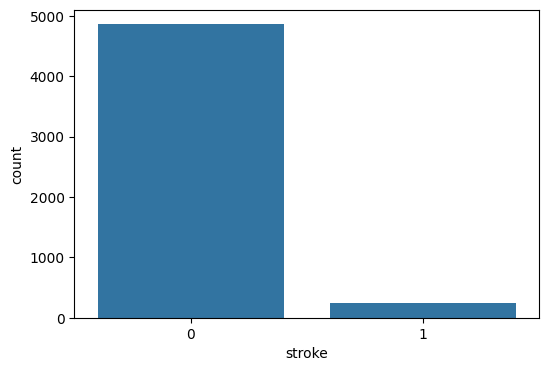

In [732]:
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df)
plt.show()

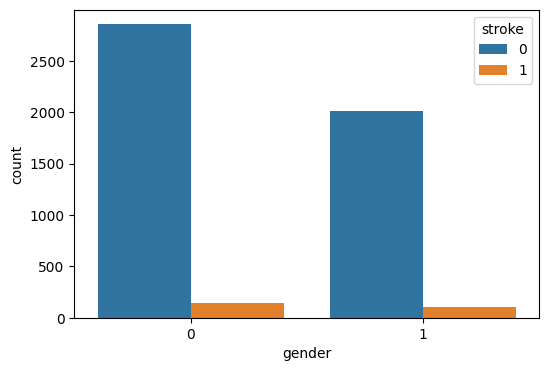

In [733]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='stroke', data=df)
plt.show()

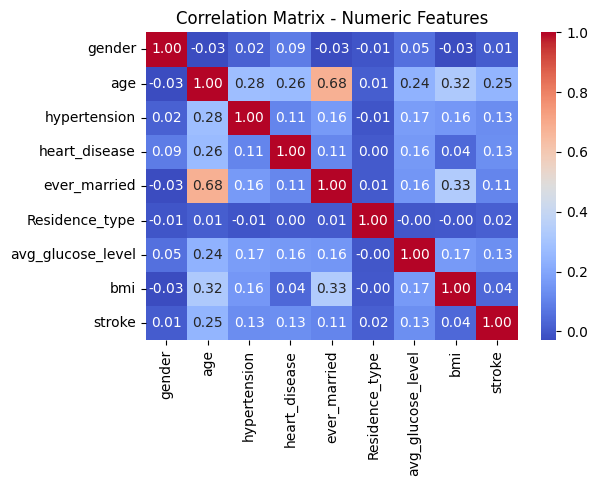

In [734]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix - Numeric Features")
plt.show()

Skewness of numeric features:
 age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.088187
dtype: float64


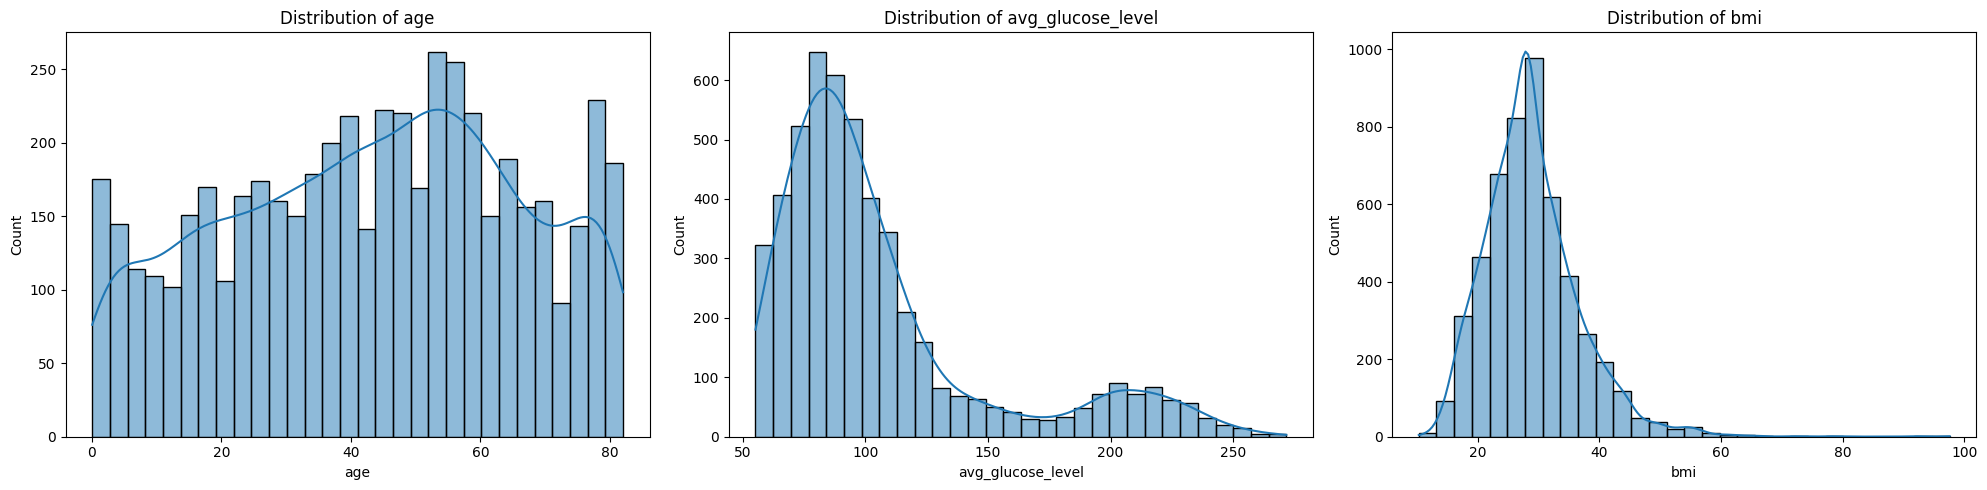

In [735]:
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

skew_values = df[numeric_cols].skew()
print("Skewness of numeric features:\n", skew_values)

plt.figure(figsize=(20, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [736]:
df['avg_glucose_level'] = np.log1p(df['avg_glucose_level'])
df['bmi'] = np.log1p(df['bmi'])

New skewness after log transform:
 avg_glucose_level    0.889470
bmi                  0.029777
dtype: float64


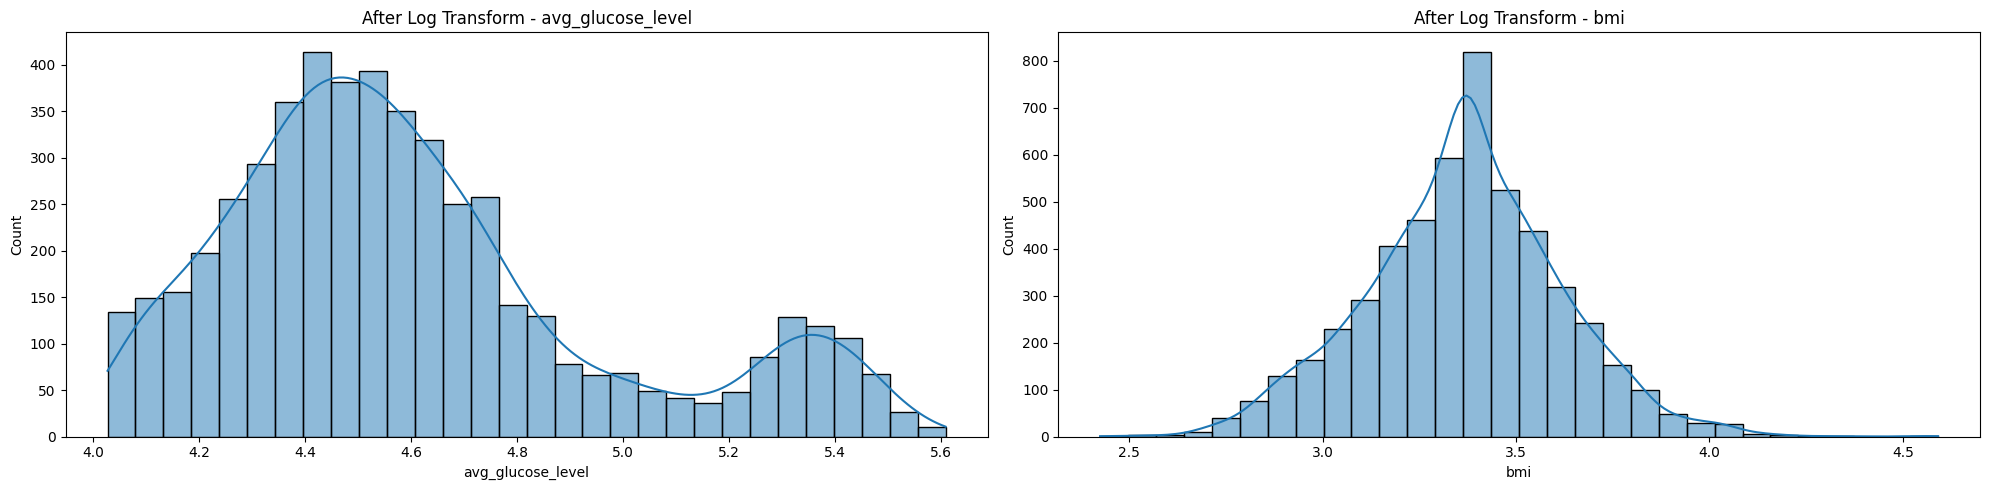

In [737]:
skew_aft = df[['avg_glucose_level', 'bmi']].skew()
print("New skewness after log transform:\n", skew_aft)

plt.figure(figsize=(20, 5))
for i, col in enumerate(['avg_glucose_level', 'bmi']):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'After Log Transform - {col}')
plt.tight_layout()
plt.show()

age: 0 outliers.
avg_glucose_level: 384 outliers.
bmi: 88 outliers.


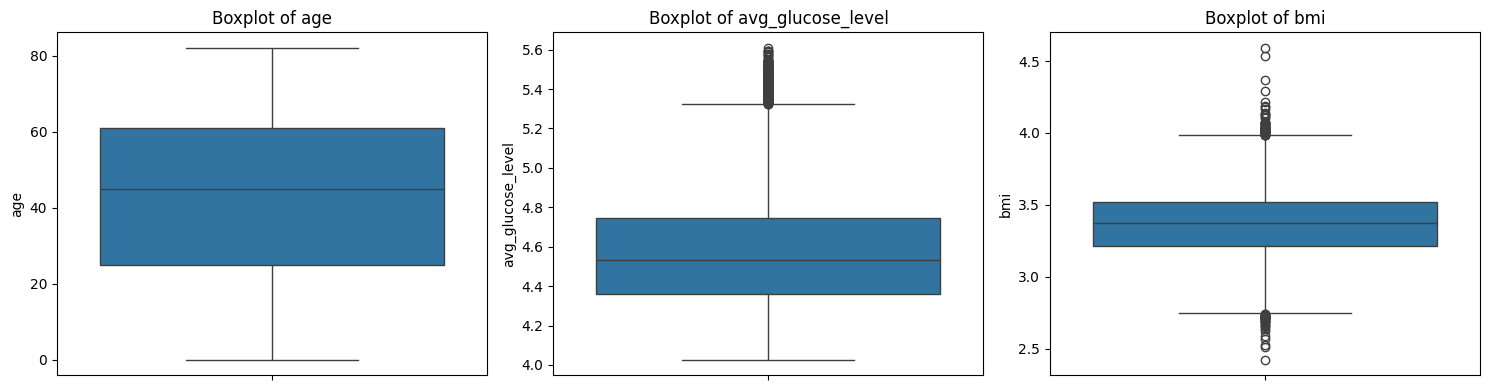

In [738]:
num_features = ['age', 'avg_glucose_level', 'bmi']

for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers.")

plt.figure(figsize=(15, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

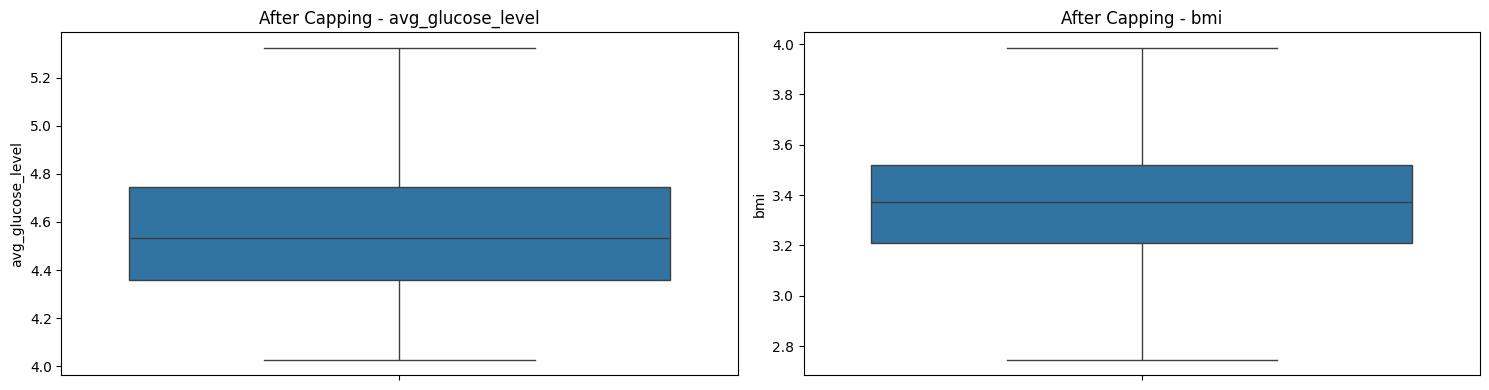

In [739]:
cols = ['avg_glucose_level', 'bmi']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = df[col].clip(lower, upper)

plt.figure(figsize=(15,4))
for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'After Capping - {col}')
plt.tight_layout()
plt.show()

In [740]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [741]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [742]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [743]:
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [744]:
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)

In [745]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (7777, 15) (7777,)
Test shape: (1945, 15) (1945,)


In [746]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [747]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Accuracy: 0.819
Confusion Matrix:
 [[772 203]
 [149 821]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       975
           1       0.80      0.85      0.82       970

    accuracy                           0.82      1945
   macro avg       0.82      0.82      0.82      1945
weighted avg       0.82      0.82      0.82      1945



--- Random Forest ---
Accuracy: 0.944
Confusion Matrix:
 [[903  72]
 [ 37 933]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       975
           1       0.93      0.96      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



--- Gradient Boosting ---
Accuracy: 0.8761
Confusion Matrix:
 [[822 153]
 [ 88 882]]
Classification Report:
               preci

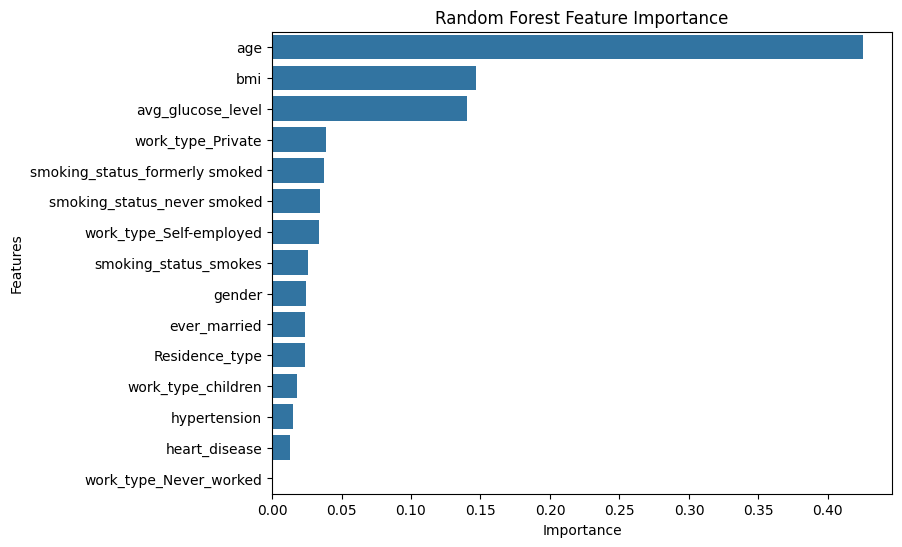

In [748]:
X_res_df = pd.DataFrame(X_res_scaled, columns=X_res.columns)
rf_model = models['Random Forest']

feat_imp = pd.Series(rf_model.feature_importances_, index=X_res_df.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [749]:
import pickle

feature_columns = X_res.columns.tolist()
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('random_forest_stroke_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("✅ Random Forest model saved successfully!")

✅ Random Forest model saved successfully!
